# Answer1

In [1]:
using Pkg
# Pkg.add("Colors")

In [2]:
# 1

using Colors
using DSP

function deri(a)
    new_coef = []
    for i in 1:(length(a)-1)
        append!(new_coef, a[i]*(length(a)-i))
    end
    return new_coef
end

function plot_frog(a, b, c, d, n_now, start_x, end_x)
    
    n_child = (n_now - c) / d
    
    # split x

    x_child = []
    for i in 0:(n_child-1)
        append!(x_child, start_x + (end_x - start_x)/(n_child-1)*i)
    end    
    
    x_now = []
    for i in 0:(n_now-1)
        append!(x_now, start_x + (end_x - start_x)/(n_now-1)*i)
    end
    
    coef = [a[1], -a[2]]
    
    # convolution
    for i in 2:b
        coef = conv(coef, [a[2*i-1], -a[2*i]])
    end
    
    actual_y = []
"""  
    # actual_y
    actual_y(x) = 0
    
    for i in 1:length(coef)
        actual_y(x) += coef[i]*(x^(length(coef) - i))
    end

"""

    for i in [start_x : 0.01 : end_x ;]
        y = 0
        for j in 1:length(coef)
            y += coef[j] * i^(length(coef)-j)
        end
        append!(actual_y, y)
    end

    # deritatives
    first_deri_coef = deri(coef)
    second_deri_coef = deri(first_deri_coef)
    
    # child_y
    child_y = []
    
    for i in 1:length(x_child)
        if i == 1
            y = 0
            for j in 1:length(coef)
                y += coef[j] * x_child[i]^(length(coef)-j)
            end
        else
            y = 0
            for j in 1:length(coef)
                y += coef[j] * x_child[i-1]^(length(coef)-j)
            end
            for j in 1:length(first_deri_coef)
                y += first_deri_coef[j] * x_child[i-1]^(length(first_deri_coef)-j) * (x_child[i] - x_child[i-1])
            end
        end
        append!(child_y, y)
    end

    # now_y
    now_y = []

    for i in 1:length(x_now)
        if i == 1
            y = 0
            for j in 1:length(coef)
                y += coef[j] * x_now[i]^(length(coef)-j)
            end
        else
            y = 0
            for j in 1:length(coef)
                y += coef[j] * x_now[i-1]^(length(coef)-j)
            end
            for j in 1:length(first_deri_coef)
                y += first_deri_coef[j] * x_now[i-1]^(length(first_deri_coef)-j) * (x_now[i] - x_now[i-1])
            end
            for j in 1:length(second_deri_coef)
                y += second_deri_coef[j] * x_now[i-1]^(length(second_deri_coef)-j) * (x_now[i] - x_now[i-1])^2 / 2
            end
        end
        append!(now_y, y)
    end

    plot([start_x:0.01:end_x;], actual_y, color = :black, linewidth=3, label="Actual_Trace", title="Freg we love you!", xlabel="X value", ylabel="Y value")
    plot!(x_now, now_y, color = :blue, width=3, label="Current", linewidth=1.5)
    scatter!(x_now, now_y, color = :blue, label=false)
    plot!(x_child, child_y, color = :green, width=3, label="Childhood", linewidth=1.5)
    scatter!(x_child, child_y, color = :green, label=false)
    
    # return([actual_y child_y now_y])

end

plot_frog (generic function with 1 method)

## test data


(process:12460): GLib-GIO-WARNING **: 22:13:05.377: Unexpectedly, UWP app `15191PeakPlayer.50533F9B98293_3.2.6.0_x64__y5c4dfz5b21fm' (AUMId `15191PeakPlayer.50533F9B98293_y5c4dfz5b21fm!App') supports 32 extensions but has no verbs

(process:12460): GLib-GIO-WARNING **: 22:13:05.534: Unexpectedly, UWP app `Evernote.Evernote_10.25.6.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs


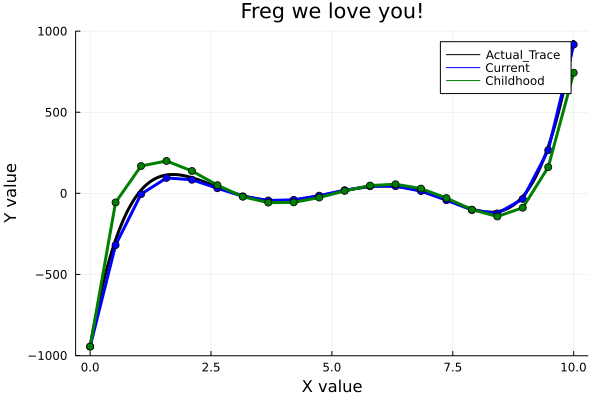

In [3]:
# a

using Plots

a = [1, 1, 1, 3, 1, 5, 1, 7, 1, 9]
b = 5
c = 0
d = 1
n_now = 20
start_x = 0
end_x = 10

frog_plot_1 = plot_frog(a, b, c, d, n_now, start_x, end_x)

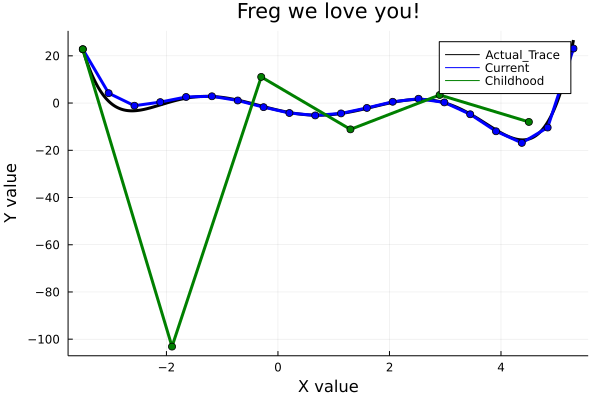

In [4]:
# b

a = [1/2, 3/2, 1/3, -1, 1/2, 1, 1/2, -1, 2/5, 2, 2, -1]
b = 6
c = 7
d = 2
n_now = 20
start_x = -3.5
end_x = 5.3

frog_plot_2 = plot_frog(a, b, c, d, n_now, start_x, end_x)

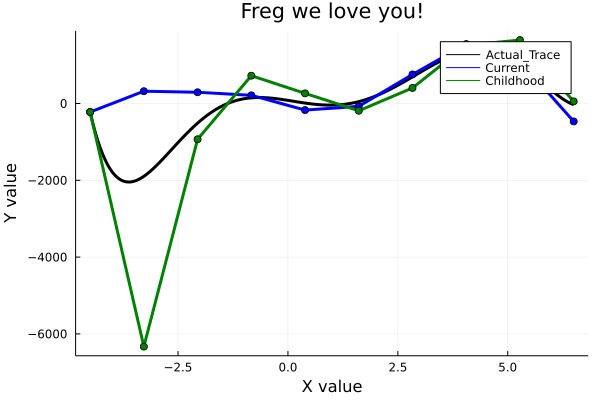

In [5]:
# c

a = [1.73, 0.8, 0.253, -0.347, 0.88, 1.24, 2.384, -10.83, 0.537, 3.456, 0.923, 6.34]
b = 6
c = 0
d = 1
n_now = 10
start_x = -4.5
end_x = 6.5

frog_plot_3 = plot_frog(a, b, c, d, n_now, start_x, end_x)

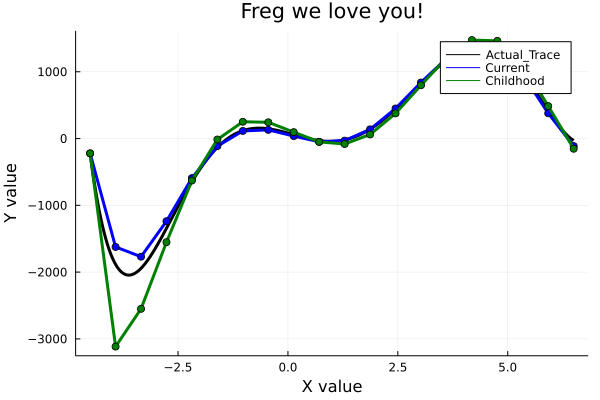

In [6]:
# d

a = [1.73, 0.8, 0.253, -0.347, 0.88, 1.24, 2.384, -10.83, 0.537, 3.456, 0.923, 6.34]
b = 6
c = 0
d = 1
n_now = 20
start_x = -4.5
end_x = 6.5

frog_plot_4 = plot_frog(a, b, c, d, n_now, start_x, end_x)

## e

(d) did the better job on approximation because there are more nodes(n_now, n_child) for (d) to approxiamate.

Second order Taylor approximation did a better job than first order Taylor approximation because the former is linear approximation the latter is quadratic approximation which can predict the function more precisely.

Taylor approximation performs a bad approximation when function looks bumpy.

# Answer 2

In [7]:
using Pkg
# Pkg.add("Tables")
# Pkg.add("DelimitedFiles")
using Tables
using DelimitedFiles

In [8]:
# using Pkg
# Pkg.add("CSV")
# Pkg.add("DataFrames")
using CSV
using DataFrames
Anny_1 = readdlm("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Anny_M_score1.csv", ',', Float64)

10000×4 Matrix{Float64}:
     1.0   19.6659    34.9391    26.0836
     2.0   74.8286    37.2173    49.1225
     3.0  -11.1062     7.01294   20.2709
     4.0   83.8112    78.1046   108.263
     5.0  102.894     77.1409   107.227
     6.0   57.3833    47.8947    71.287
     7.0   57.9971    95.6572    88.4208
     8.0   85.2892    88.1536   128.722
     9.0   55.3807    50.6345    44.0257
    10.0   77.3117   148.465    -20.5185
    11.0   80.786     95.4865    64.9881
    12.0   53.6277    84.0265    59.2436
    13.0    7.37145   18.8524    39.3885
     ⋮                          
  9989.0   37.4289    34.2076    83.4877
  9990.0   89.9814    85.5843   100.646
  9991.0   11.4333    72.7193   111.701
  9992.0   73.7199   100.517     23.2556
  9993.0   44.3346    25.7543    90.3838
  9994.0    4.34794   30.9891    26.627
  9995.0   49.0126    61.7289    57.2585
  9996.0   37.6264    74.5513    80.7299
  9997.0   30.8143    37.5323    57.128
  9998.0   73.8104    99.2666    76.9677
  9999.

In [9]:
using LinearAlgebra

theta_1 = [80; 90; 100]
theta_2 = [50; 60; 70]
theta_3 = [20; 30; 40]

C1 = [125 -75 45;
      -75 310 90;
      45 90 440]
C2 = [300 125 -400;
      125 750 -375;
      -400 -375 900]
C3 = [360 125 190;
      125 250 80;
      190 80 160]

p_w1 = 0.3
p_w2 = 0.25
p_w3 = 0.45

function distance(x, theta, C, p, n)
    dis = log(p) + n/2*log(2*pi) - 1/2*log(det(inv(C))) - 1/2*((x-theta)' * inv(C) * (x-theta))
    return dis
end

distance (generic function with 1 method)

In [10]:
classify_1 = []

for i in 1:length(Anny_1[:, 1])
    x = [Anny_1[i, 2]; Anny_1[i, 3]; Anny_1[i, 4]]
    dis_1 = distance(x, theta_1, C1, p_w1, 3)
    dis_2 = distance(x, theta_2, C2, p_w2, 3)
    dis_3 = distance(x, theta_3, C3, p_w3, 3)
    if dis_2 <= dis_1
        if dis_3 <= dis_2
            append!(classify_1, 3)
        else
            append!(classify_1, 2)
        end
    else
        if dis_3 <= dis_1
            append!(classify_1, 3)
        else
            append!(classify_1, 1)
        end
    end
end

In [11]:
classify_1 = [[1:1:length(Anny_1[:, 1]);] classify_1];

In [16]:
CSV.write("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Anny_classify_result1.csv", Tables.table(classify_1), writeheader = false)

"C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Anny_classify_result1.csv"

In [12]:
Anny_2 = readdlm("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Anny_M_score2.csv", ',', Float64)

10000×4 Matrix{Float64}:
     1.0   19.6659    34.9391    26.0836
     2.0   74.8286    37.2173    49.1225
     3.0  -11.1062     7.01294   20.2709
     4.0   83.8112    78.1046   108.263
     5.0  102.894     77.1409   107.227
     6.0   57.3833    47.8947    71.287
     7.0   57.9971    95.6572    88.4208
     8.0   85.2892    88.1536   128.722
     9.0   55.3807    50.6345    44.0257
    10.0   77.3117   148.465    -20.5185
    11.0   80.786     95.4865    64.9881
    12.0   53.6277    84.0265    59.2436
    13.0    7.37145   18.8524    39.3885
     ⋮                          
  9989.0   37.4289    34.2076    83.4877
  9990.0   89.9814    85.5843   100.646
  9991.0   11.4333    72.7193   111.701
  9992.0   73.7199   100.517     23.2556
  9993.0   44.3346    25.7543    90.3838
  9994.0    4.34794   30.9891    26.627
  9995.0   49.0126    61.7289    57.2585
  9996.0   37.6264    74.5513    80.7299
  9997.0   30.8143    37.5323    57.128
  9998.0   73.8104    99.2666    76.9677
  9999.

In [13]:
using LinearAlgebra

theta_1 = [87.96; 61.85; 118.42]
theta_2 = [127.69; 116.18; 80.31]
theta_3 = [74.90; 49.92; 92.98]

C1 = [66.65 62.86 5.78;
      62.86 77.46 -8.41;
      5.78 -8.41 140.11]
C2 = [161.54 53.49 39.35;
      53.49 177.16 64.00;
      39.35 64.00 159.26]
C3 = [29.93 27.92 12.57;
      27.92 35.09 1.90;
      12.57 1.90 137.73]

p_w1 = 0.2
p_w2 = 0.5
p_w3 = 0.3

####################
classify_2 = []

for i in 1:length(Anny_2[:, 1])
    x = [Anny_2[i, 2]; Anny_2[i, 3]; Anny_2[i, 4]]
    dis_1 = distance(x, theta_1, C1, p_w1, 3)
    dis_2 = distance(x, theta_2, C2, p_w2, 3)
    dis_3 = distance(x, theta_3, C3, p_w3, 3)
    if dis_2 <= dis_1
        if dis_3 <= dis_2
            append!(classify_2, 3)
        else
            append!(classify_2, 2)
        end
    else
        if dis_3 <= dis_1
            append!(classify_2, 3)
        else
            append!(classify_2, 1)
        end
    end
end


classify_2 = [[1:1:length(Anny_2[:, 1]);] classify_2]

10000×2 Matrix{Any}:
     1  3
     2  1
     3  3
     4  3
     5  3
     6  2
     7  3
     8  3
     9  1
    10  3
    11  3
    12  3
    13  3
     ⋮  
  9989  3
  9990  3
  9991  3
  9992  3
  9993  2
  9994  3
  9995  3
  9996  3
  9997  3
  9998  3
  9999  3
 10000  3

In [19]:
CSV.write("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Anny_classify_result2.csv", Tables.table(classify_2), writeheader = false)

"C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Anny_classify_result2.csv"

### part 2

In [14]:
Death_1 = readdlm("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\death_threat1.csv", ',', Float64)

using LinearAlgebra

theta_1 = [20; 30]
theta_2 = [50; 60]


C1 = [125 -75;
      -75 310]
C2 = [300 125;
      125 750]


p_w1 = 0.3
p_w2 = 0.7

####################
death_classify_1 = []

for i in 1:length(Death_1[:, 1])
    x = [Death_1[i, 2]; Death_1[i, 3]]
    dis_1 = distance(x, theta_1, C1, p_w1, 2)
    dis_2 = distance(x, theta_2, C2, p_w2, 2)

    if dis_2 <= dis_1
        append!(death_classify_1, 2)
    else
        append!(death_classify_1, 1)
    end
end

death_classify_1 = [Death_1 death_classify_1]

1000×4 Matrix{Any}:
    1.0  33.1074   36.0167   1
    2.0  24.6462   35.6191   1
    3.0  27.667    29.9948   1
    4.0   3.48571  41.9719   2
    5.0  36.3956   17.588    1
    6.0  26.7843   58.592    1
    7.0  13.4203   35.1467   2
    8.0  41.5316   -4.15245  1
    9.0  24.2301   47.2661   1
   10.0  32.6193   16.8688   1
   11.0   9.15135  20.2984   2
   12.0  -4.01091  45.1445   2
   13.0  16.2311   32.4745   2
    ⋮                        
  989.0  19.2224   27.8145   2
  990.0  23.4372   14.4648   1
  991.0  16.0245   45.8218   1
  992.0  10.4555   62.737    1
  993.0  29.7477   24.6613   1
  994.0   9.59359  35.9466   2
  995.0  16.5495   44.0054   1
  996.0  39.408    -6.13304  1
  997.0  11.4673   36.8093   2
  998.0  33.2646   42.9958   1
  999.0  34.1611   26.3749   1
 1000.0  20.7574   13.774    2

In [15]:
using Plots

boundary = [[], []]

boundary_order = [[], []]

for i in [-20:0.05:40;]
    for j in [-20:0.05:90;]
        x = [i; j]
        dis_1 = distance(x, theta_1, C1, p_w1, 2)
        dis_2 = distance(x, theta_2, C2, p_w2, 2)
        if abs(dis_1 - dis_2) <= 0.0001
            append!(boundary[1], i)
            append!(boundary[2], j)
        end
    end
end

for i in 1:(length(boundary[1]) - 1)
    if i == 1
        append!(boundary_order[1], boundary[1][1])
        append!(boundary_order[2], boundary[2][1])
        deleteat!(boundary[1], 1)
        deleteat!(boundary[2], 1)
    else
        dis = []
        for j in 1:length(boundary[1])
            append!(dis, norm([boundary_order[1][i-1], boundary_order[2][i-1]] - [boundary[1][j], boundary[2][j]]))
        end
        append!(boundary_order[1], boundary[1][findmin(dis)[2]])
        append!(boundary_order[2], boundary[2][findmin(dis)[2]])
        deleteat!(boundary[1], findmin(dis)[2])
        deleteat!(boundary[2], findmin(dis)[2])
    end
end

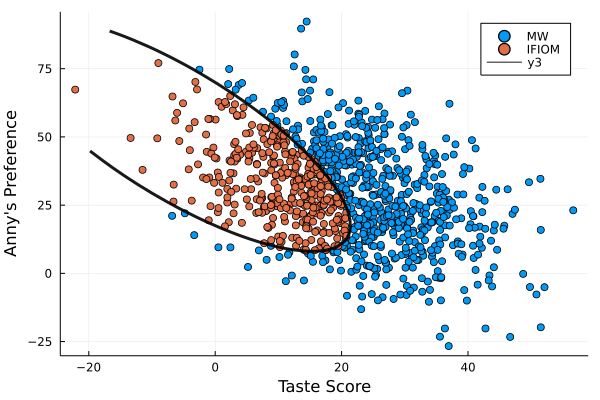

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:134.
└ @ Plots C:\Users\kenhc\.julia\packages\Plots\vFFCj\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:134.
└ @ Plots C:\Users\kenhc\.julia\packages\Plots\vFFCj\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:134.
└ @ Plots C:\Users\kenhc\.julia\packages\Plots\vFFCj\src\utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:134.
└ @ Plots C:\Users\kenhc\.julia\packages\Plots\vFFCj\src\utils.jl:132


In [16]:
N = length(death_classify_1[:, 1])
grps  = [[death_classify_1[i, :] for i=1:N if death_classify_1[i, 4] == j] for j=1:2]
scatter([c[2] for c in grps[1]], [c[3] for c in grps[1]], label="MW", xlabel="Taste Score", ylabel="Anny's Preference")
scatter!([c[2] for c in grps[2]], [c[3] for c in grps[2]], label="IFIOM")
plot!([c for c in boundary_order[1]], [c for c in boundary_order[2]], color = [RGBA(0, 0, 0, 0.9)], width=3, label=false)

In [17]:
Death_2 = readdlm("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\death_threat2.csv", ',', Float64)

using LinearAlgebra

theta_1 = [80; 120]
theta_2 = [140; 150]


C1 = [1225 -525;
      -525 400]
C2 = [900 390;
      390 400]


p_w1 = 0.4
p_w2 = 0.6

####################
death_classify_2 = []

for i in 1:length(Death_2[:, 1])
    x = [Death_2[i, 2]; Death_2[i, 3]]
    dis_1 = distance(x, theta_1, C1, p_w1, 2)
    dis_2 = distance(x, theta_2, C2, p_w2, 2)

    if dis_2 <= dis_1
        append!(death_classify_2, 2)
    else
        append!(death_classify_2, 1)
    end
end

death_classify_2 = [Death_2 death_classify_2]

#########################################################
boundary = [[], []]

for i in [0:0.05:200;]
    for j in [60:0.05:225;]
        x = [i; j]
        dis_1 = distance(x, theta_1, C1, p_w1, 2)
        dis_2 = distance(x, theta_2, C2, p_w2, 2)
        if abs(dis_1 - dis_2) <= 0.0001
            append!(boundary[1], i)
            append!(boundary[2], j)
        end
    end
end


boundary_order = [[], []]

boundary_order_two = [[], []]

follow_one = []

for i in 1:(length(boundary[1]) - 1)
    if i == 1
        append!(boundary_order[1], boundary[1][1])
        append!(boundary_order[2], boundary[2][1])
        deleteat!(boundary[1], 1)
        deleteat!(boundary[2], 1)
        follow_one = [boundary[1][1], boundary[2][1]]
    elseif i == 47
        append!(boundary_order_two[1], boundary[1][1])
        append!(boundary_order_two[2], boundary[2][1])
        deleteat!(boundary[1], 1)
        deleteat!(boundary[2], 1)
        follow_one = [boundary[1][1], boundary[2][1]]
    else
        dis = []

        for j in 1:length(boundary[1])
            append!(dis, norm(follow_one - [boundary[1][j], boundary[2][j]]))
        end

        if (boundary[1][findmin(dis)[2]] + boundary[2][findmin(dis)[2]]) > 200
            append!(boundary_order_two[1], boundary[1][findmin(dis)[2]])
            append!(boundary_order_two[2], boundary[2][findmin(dis)[2]])
            follow_one = [boundary[1][findmin(dis)[2]], boundary[2][findmin(dis)[2]]]
            deleteat!(boundary[1], findmin(dis)[2])
            deleteat!(boundary[2], findmin(dis)[2])
        else
            print("else1 ", i)
            append!(boundary_order[1], boundary[1][findmin(dis)[2]])
            append!(boundary_order[2], boundary[2][findmin(dis)[2]])
            follow_one = [boundary[1][findmin(dis)[2]], boundary[2][findmin(dis)[2]]]
            deleteat!(boundary[1], findmin(dis)[2])
            deleteat!(boundary[2], findmin(dis)[2])
        end
    end
end


else1 2else1 3else1 4else1 5else1 6else1 7else1 8else1 9else1 10else1 11else1 12else1 13else1 14else1 15else1 16else1 17else1 18else1 19else1 20else1 21else1 22else1 23else1 24else1 25else1 26else1 27else1 28else1 29else1 30else1 31else1 32else1 33else1 34else1 35else1 36else1 37else1 38else1 39else1 40else1 41else1 42else1 43else1 44else1 45else1 46

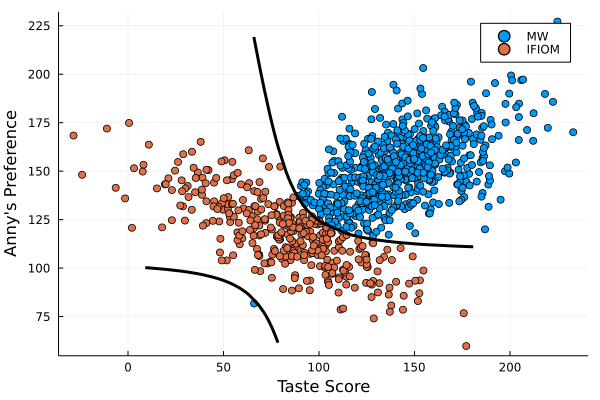

In [19]:
N = length(death_classify_2[:, 1])
grps  = [[death_classify_2[i, :] for i=1:N if death_classify_2[i, 4] == j] for j=1:2]
scatter([c[2] for c in grps[1]], [c[3] for c in grps[1]], label="MW", xlabel="Taste Score", ylabel="Anny's Preference")
scatter!([c[2] for c in grps[2]], [c[3] for c in grps[2]], label="IFIOM")
plot!([c for c in boundary_order[1]], [c for c in boundary_order[2]], color = :black, width=3, label=false)
plot!([c for c in boundary_order_two[1]], [c for c in boundary_order_two[2]], color = :black, width=3, label=false)

# Answer 3

In [31]:
using LinearAlgebra

function gram_schmidt(a; tol = 1e-10)
    
    a = convert(Matrix{Float64}, a)
    
    for i = 1:length(a[1, :])

        for j = 1:i-1
            a[:, i] -= (a[:, j]'*a[:, i]) * a[:, j]
        end

        if norm(a[:, i]) < tol
            println("Vectors are linearly dependent.")
            return a
        end
        
        a[:, i] = a[:, i]/norm(a[:, i])
    end
   
    return a
end

gram_schmidt (generic function with 1 method)

### input1

In [47]:
meta1 = readdlm("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_input1.csv", ',', Float64)

4×5 Matrix{Float64}:
  97.307  102.577   89.3056   65.6174  102.104
 147.204  129.934  121.332   162.171   139.907
 129.584  138.153  191.443   199.743   131.033
 162.608  189.183  180.312   150.118   156.032

In [48]:
new_sys = gram_schmidt(meta1[:, 1:4])

4×4 Matrix{Float64}:
 0.356814   0.0265629  -0.31298   -0.879785
 0.539782  -0.778786   -0.1844     0.261005
 0.47517    0.0856738   0.868314  -0.113598
 0.596265   0.620844   -0.337744   0.380723

In [49]:
new = [new_sys inv(new_sys)*meta1[:, 5]]

4×5 Matrix{Float64}:
 0.356814   0.0265629  -0.31298   -0.879785  267.251
 0.539782  -0.778786   -0.1844     0.261005    1.85185
 0.47517    0.0856738   0.868314  -0.113598    3.32354
 0.596265   0.620844   -0.337744   0.380723   -8.7935

In [50]:
for i in 1:size(new)[1]
    for j in 1:size(new)[2]
        new[i, j] = round(new[i, j], digits=4)
    end
end

In [51]:
CSV.write("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_output1.csv", Tables.table(new), writeheader = false)

"C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_output1.csv"

### input2

In [52]:
meta2 = readdlm("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_input2.csv", ',', Float64);

In [53]:
new_sys = gram_schmidt(meta2[:, 1:4]);

In [54]:
new = [new_sys inv(new_sys)*meta2[:, 5]];

In [55]:
for i in 1:size(new)[1]
    for j in 1:size(new)[2]
        new[i, j] = round(new[i, j], digits=4)
    end
end

In [56]:
CSV.write("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_output2.csv", Tables.table(new), writeheader = false)

"C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_output2.csv"

### input3

In [57]:
meta3 = readdlm("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_input3.csv", ',', Float64);

In [58]:
new_sys = gram_schmidt(meta3[:, 1:4]);

In [59]:
new = [new_sys inv(new_sys)*meta3[:, 5]];

In [60]:
for i in 1:size(new)[1]
    for j in 1:size(new)[2]
        new[i, j] = round(new[i, j], digits=4)
    end
end

In [61]:
CSV.write("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_output3.csv", Tables.table(new), writeheader = false)

"C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_output3.csv"

### input4

In [62]:
meta4 = readdlm("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_input4.csv", ',', Float64);

In [63]:
new_sys = gram_schmidt(meta4[:, 1:4]);

In [64]:
new = [new_sys inv(new_sys)*meta4[:, 5]];

In [65]:
for i in 1:size(new)[1]
    for j in 1:size(new)[2]
        new[i, j] = round(new[i, j], digits=4)
    end
end

In [66]:
CSV.write("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_output4.csv", Tables.table(new), writeheader = false)

"C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_output4.csv"

### input5

In [67]:
meta5 = readdlm("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_input5.csv", ',', Float64);

In [68]:
new_sys = gram_schmidt(meta5[:, 1:4]);

In [69]:
new = [new_sys inv(new_sys)*meta5[:, 5]];

In [70]:
for i in 1:size(new)[1]
    for j in 1:size(new)[2]
        new[i, j] = round(new[i, j], digits=4)
    end
end

In [71]:
CSV.write("C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_output5.csv", Tables.table(new), writeheader = false)

"C:\\Users\\kenhc\\Desktop\\桌面\\商管機器學習\\MLBA hw3_ver4\\Metaverse_output5.csv"